<a href="https://colab.research.google.com/github/MariaZharova/3-day-intensive/blob/main/%D0%9C%D0%B0%D1%80%D0%B0%D1%84%D0%BE%D0%BD_%D0%BF%D0%BE_DS%2C_%D0%B4%D0%B5%D0%BD%D1%8C_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

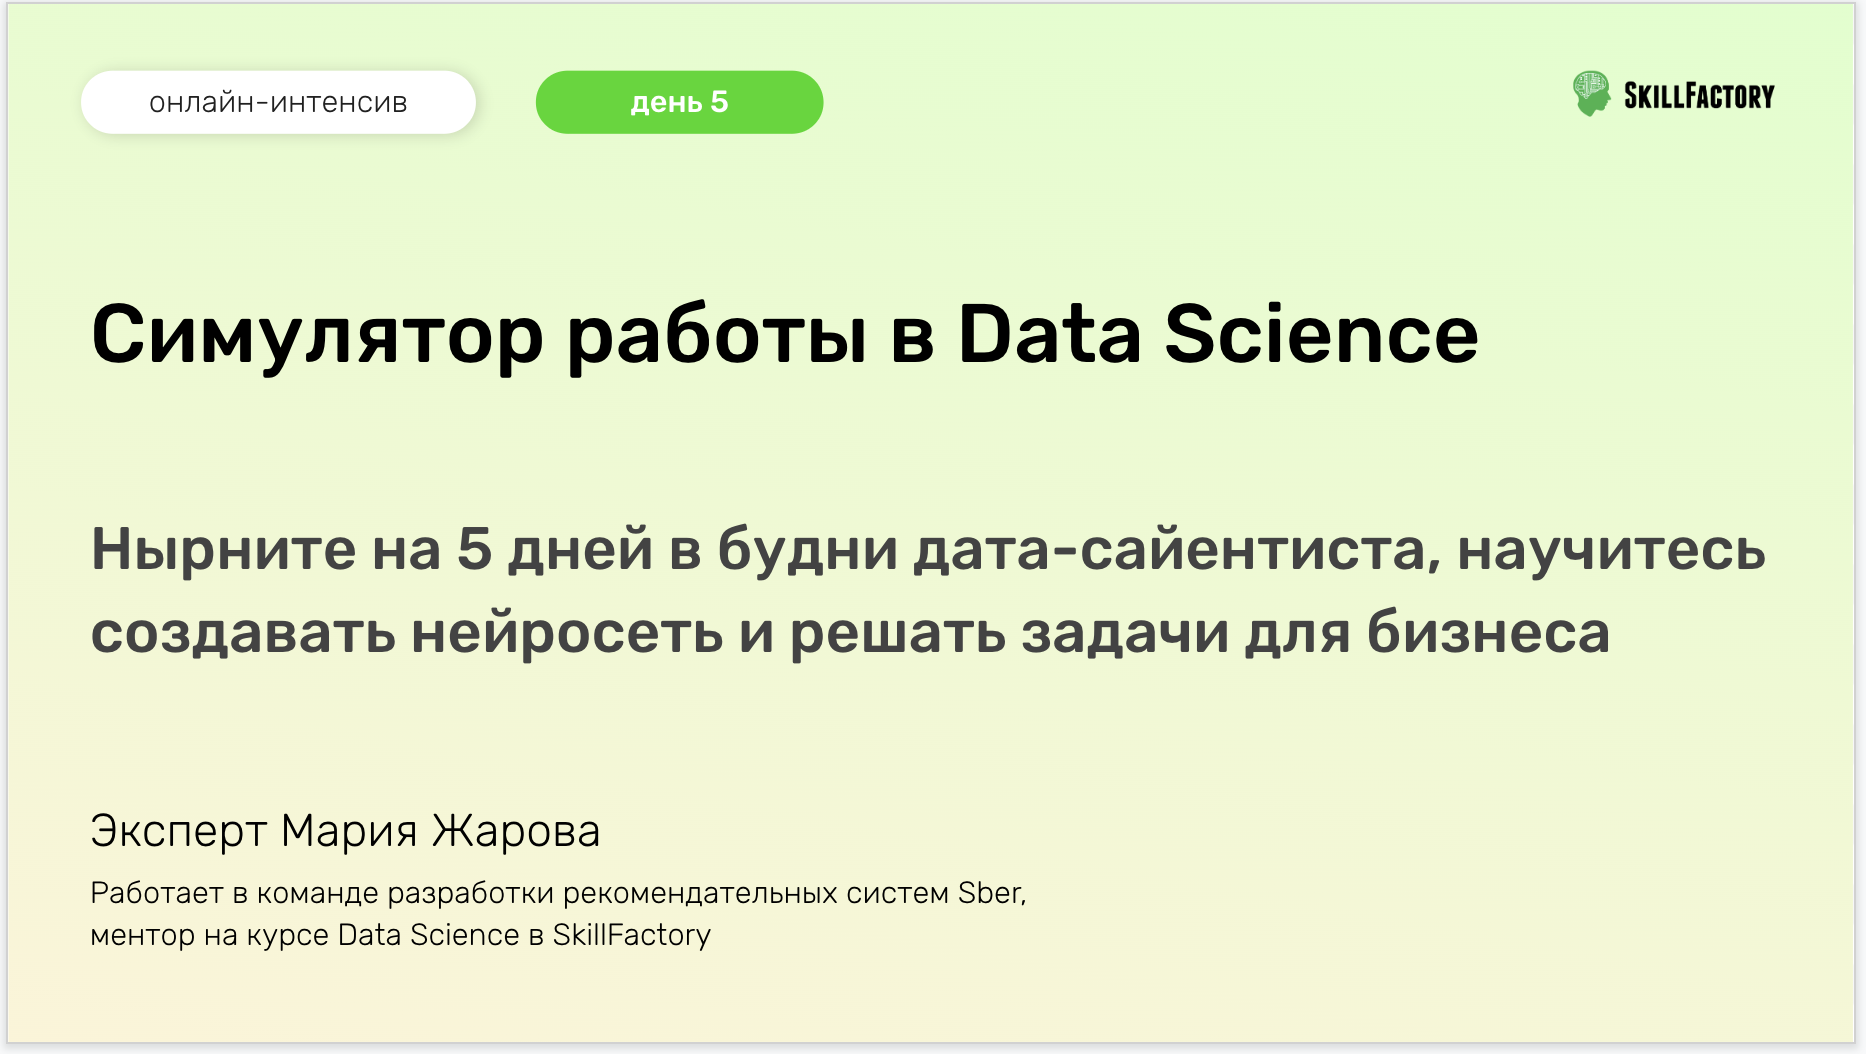



# Напоминание: что такое машинное обучение и глубокое обучение?

### ⛳ Machine learning и Deep learning – это 2 подмножества искусственного интеллекта:

- ML связан с созданием алгоритмов, которые могут изменять себя без вмешательства человека для получения желаемого результата - путем подачи себя через структурированные данные.
- В DL алгоритмы создаются и функционируют аналогично ML, но устроены они более сложно - существует множество уровней этих алгоритмов, каждый из которых обеспечивает различную интерпретацию данных, которые он передает. Такая сеть алгоритмов называется искусственными нейронными сетями. Простыми словами, это напоминает нейронные связи, которые имеются в человеческом мозге.





### ⛳ Более практическое объяснение работы ML:

- Имеем табличные данные: назовём колонки-характеристики $x_1,\; x_2\;, ..., x_N$, колонку-ответ $Y$ (пусть есть в числовом и бинарном формате):
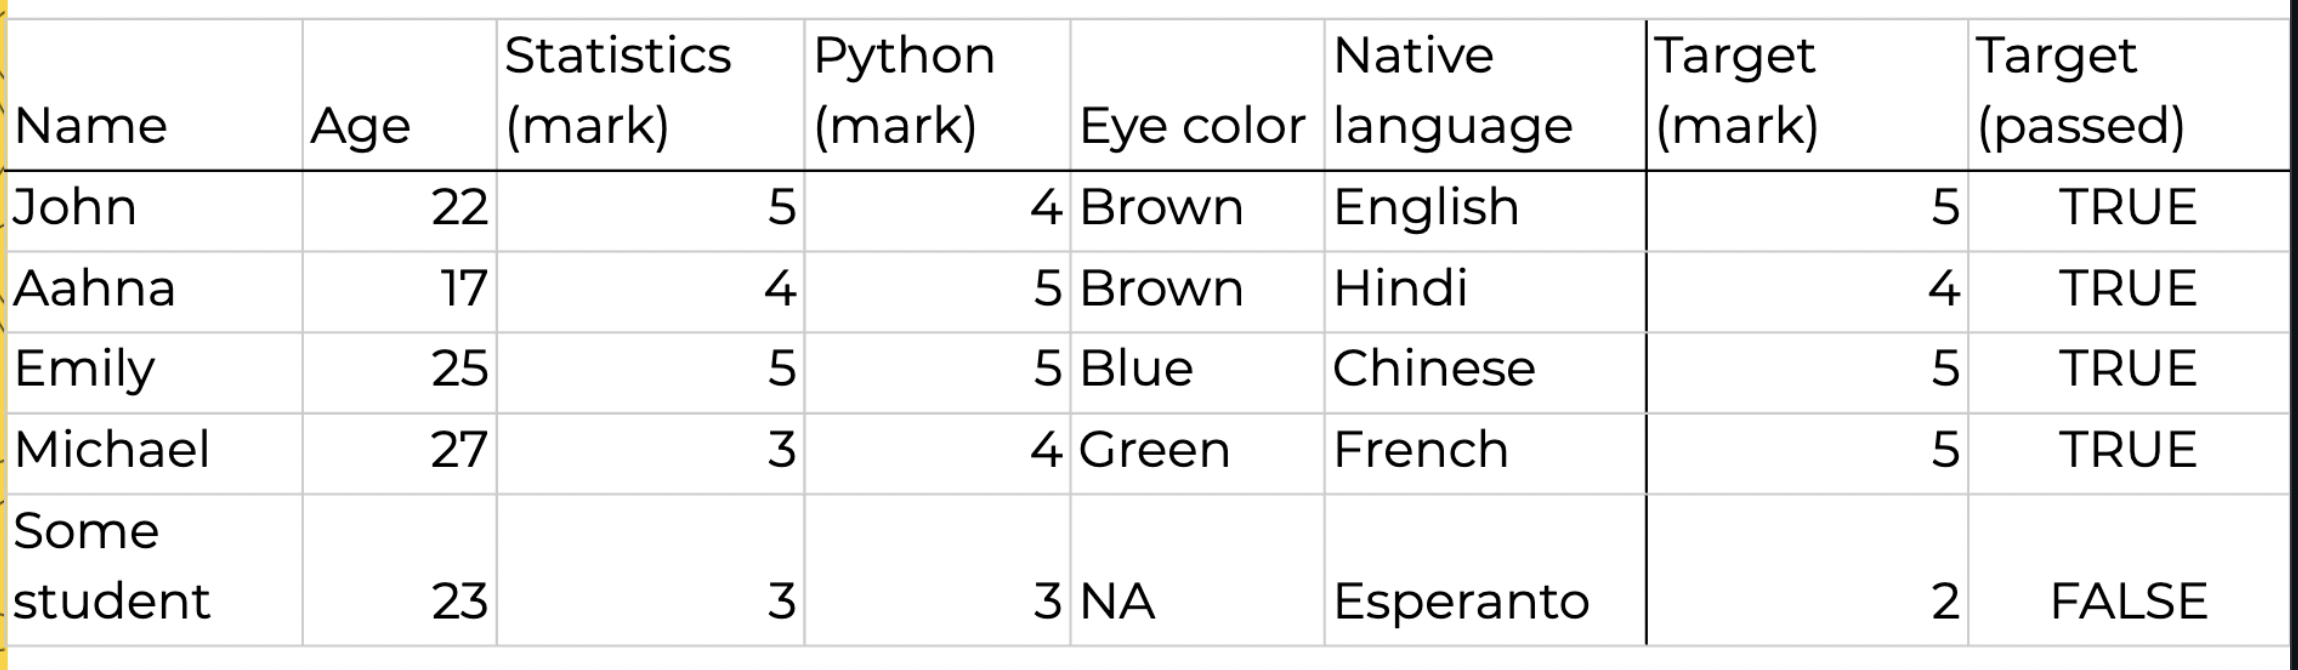


- Цель: написать алгоритм (модель машинного обучения), который бы как можно точнее предсказывал Target, видя только столбцы-характеристики. Например, очень популярный подход - подобрать такие коэффициенты $a_1, a_2, ..., a_N$, чтобы сумма $x_1\cdot a_1 + ... + x_N\cdot a_N$ максимально точно приближала истинный ответ Target (пытаемся вывести закономерности, понять, какие столбцы влияют на итоговый ответ больше всего).

- Все задачи в ML и DL можно разделить на два больших типа: классификация (когда множество значений таргета ограничено) и регресиия (таргет - любое действительное число)
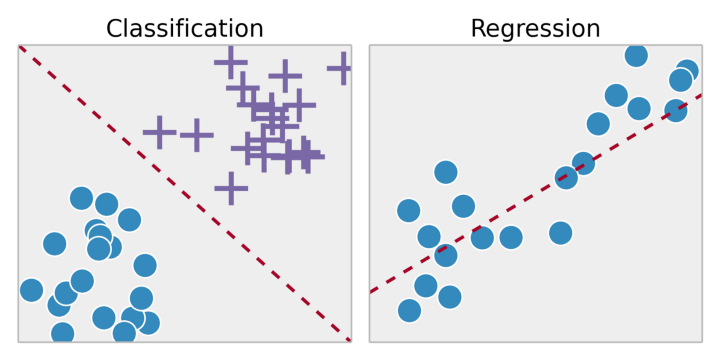

### Процесс создания, обучения модели и получение результатов

Прежде чем алгоритм сможет давать нам какие-либо предсказания, его нужно "научить" их делать - для этого модель в прямом смысле обучают: показывают ей некоторые объекты (их характеристики) и правильные ответы для них.

Также мы хотим понимать, насколько хорошо работает наш алгоритм - для этого нужен ещё один набор данных с правильными ответами, на которых мы бы уже не обучали алгоритм, но проверяли качество его работы.

Поэтому, нам нужно разделить весь набор данных на два набора:
- Тренировочный набор, на котором мы собираемся тренировать модель
- Тестовый набор, на котором мы будем тестировать нашу модель, чтобы увидеть, насколько точны ее прогнозы



Вспомним материал из начала - есть задачи классификации и регресии; у нас последнее, т.к. таргет - множество всех дейтвительных чисел. Для задачи регресии из sklearn подойдут следующие алгоритмы:
- MLP Classifier
- K Neighbors Classifier
- Decision Tree Classifier
- Support Vector Machines
- Ada Boost Classifier
- Gradient Boosting Classifier
- Random Forest Classifier
- Linear Discriminant Analysis
- Logistic Regression

На Python существует определённая последовательность команд для прохода по всем "жизненным циклам" модели:

1. Создание: здесь просто пишем нужное название
2. Обучение: при помощи метода fit, в аргумент подаются обучающие данные
3. Получение предсказаний: метод predict, в аргументе также подаются данные, на которых мы хотим получить поредсказания обученной модели
4. Оценка: существуют различные меткрики для оценки моделей, прописывается также название метода и в аргументы подаются истинные значения и предсказанные.


### ⛳ Более практическое объяснение DL



Устройство нейронных сетей имитирует человеческий мозг
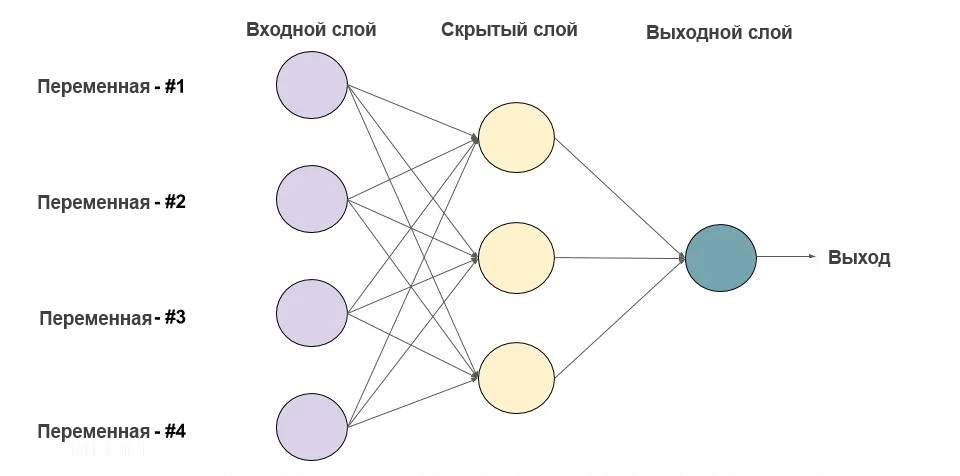

Эти алгоритмы более сложные и используют больше параметров, требуют больше места, памяти и ресурсов для работы. В остальном с точки зрения написания кода алгоритм тот же самый: создаём модель -> обучаем -> предсказываем и оцениваем.

### 🔢 Нейронная сеть, распознающая цифры по фотографии
Давайте создадим модель (нейросеть), которая будет определять по фото что за цифра на нём написана. Это, подобно титанику в анализе данных, первая классическая задача DL.

Обучать модель будем на наборе данных "MNIST" - это большая база данных рукописных цифр, которая обычно используется для создания различных систем обработки изображений. Она содержит 70 000 изображений рукописных цифр.


In [ ]:
# выгрузка библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# скачиваем файл с данными (на этот раз он встроен в библиотеку sklearn)
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784', version=1)

In [ ]:
# делим данные на обучение и тест
X = pd.DataFrame(mnist_data.data) # характеристики
y = mnist_data.target # таргет
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# создадим модель SGDClassifier
# ВНИМАНИЕ! Обучение может занять несколько минут
from sklearn.linear_model import SGDClassifier
 
sgd_clf = SGDClassifier(loss='hinge', random_state=42) # 1
sgd_clf.fit(X_train, y_train) # 2

SGDClassifier(random_state=42)

In [ ]:
# здесь посчитаем метрики :)
scoreSGD = sgd_clf.score(X_test, y_test) # 4
print("Test score of the SGDClassifier: ", scoreSGD)

Test score of the SGDClassifier:  0.8717142857142857


### Протестируем наш алгоритм

Пример для такой цифры:

five2.png

In [ ]:
sgd_clf.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['5'], dtype='<U1')

## ⛳ Домашнее задание

(спойлер - почти как вчера:))

✅ Задание 1: Объясните, это задача классификации или регресии?

__поле для ответа__

✅ Задание 2: На основе первого ответа попробуйте найти в документации ещё какие-нибудь модели из sklearn, подходящие для данной задачи и обучить их на том же наборе даных. Количество моделей неограниченно:) В качестве итога можете посчитать метрику score и выбрать наилучшую модель.

In [ ]:
# здесь можете написать Ваш код
scoreSVM

In [ ]:
# здесь можете написать Ваш код

✅ Задание 3*: Попробуйте сделать предсказание на своей собственной картинке и убедиться в корректности работы модели. Для этого необходимо нарисовать/сфотографировать цифру и преобразовать её в бинарный формат (набор чисел) - это можно сделать, например, при помощи сервиса  https://www.dcode.fr/binary-image 

Пример для такой цифры:

five2.png

In [ ]:
sgd_clf.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['5'], dtype='<U1')

## 🌟 Всем спасибо за внимание и до скорых встреч 🌟

In [ ]:
string = '0 0 0 0 0 0'
string = ','.join(string.split(' '))
string

'0,0,0,0,0,0'